In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

catamarca ar
yellowknife ca
praia da vitoria pt
tiksi ru
hithadhoo mv
bathsheba bb
neiafu to
kardla ee
port blair in
vostok ru
kapaa us
tuktoyaktuk ca
vallenar cl
la palma pa
bluff nz
bubaque gw
gamba ga
darnah ly
cape town za
ponta do sol cv
illoqqortoormiut gl
yar-sale ru
tuatapere nz
atuona pf
voznesenye ru
ngora ug
kapaa us
avarua ck
acajutla sv
kodiak us
vaini to
provideniya ru
minab ir
mar del plata ar
grand river south east mu
butaritari ki
hilo us
atuona pf
makakilo city us
hermanus za
tumannyy ru
nemuro jp
yellowknife ca
chumikan ru
kollo ne
vaini to
mahibadhoo mv
sao filipe cv
kothi in
port alfred za
kaoma zm
wanning cn
atuona pf
kapaa us
fortuna us
dikson ru
hermanus za
mataura pf
llandrindod wells gb
busselton au
tiksi ru
yellowknife ca
punta alta ar
carnarvon au
sisimiut gl
taolanaro mg
barentsburg sj
nanortalik gl
keetmanshoop na
yar-sale ru
sistranda no
carnarvon au
torbay ca
anito ph
punta arenas cl
vaini to
tuktoyaktuk ca
port blair in
kalengwa zm
hermanus za
rio galle

pacific grove us
punta arenas cl
nanortalik gl
port elizabeth za
labuhan id
grand river south east mu
jiutai cn
bluff nz
trairi br
albany au
attawapiskat ca
mataura pf
vaini to
san quintin mx
bredasdorp za
ushuaia ar
narsaq gl
gat ly
paamiut gl
tasiilaq gl
mataura pf
casimiro de abreu br
hobart au
provideniya ru
port-cartier ca
albany au
albany au
east london za
hermanus za
tasiilaq gl
nikki bj
badou tg
rikitea pf
saint-pierre pm
yumen cn
airai pw
roald no
aklavik ca
kadykchan ru
tumannyy ru
belushya guba ru
meyungs pw
rikitea pf
longyearbyen sj
jamestown sh
bulgan mn
san jose gt
bambous virieux mu
rikitea pf
adrar dz
swellendam za
uwayl sd
vaini to
bhilwara in
taolanaro mg
severo-kurilsk ru
hermanus za
cockburn town tc
dikson ru
dikson ru
rikitea pf
port alfred za
ushuaia ar
nikolskoye ru
pangkalanbuun id
rikitea pf
mataura pf
sistranda no
katsuura jp
bambous virieux mu
rikitea pf
tuktoyaktuk ca
broome au
lubao cd
corrente br
mahebourg mu
riviere-du-loup ca
sitka us
tevaitoa pf
miyang

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [19]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5c019dec88da2f724bdb8796181060cd


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | catamarca
Processing Record 2 of Set 12 | yellowknife
Processing Record 3 of Set 12 | praia da vitoria
Processing Record 4 of Set 12 | tiksi
Processing Record 5 of Set 12 | hithadhoo
Processing Record 6 of Set 12 | bathsheba
Processing Record 7 of Set 12 | neiafu
Processing Record 8 of Set 12 | kardla
Processing Record 9 of Set 12 | port blair
Processing Record 10 of Set 12 | vostok
Processing Record 11 of Set 12 | kapaa
Processing Record 12 of Set 12 | tuktoyaktuk
Processing Record 13 of Set 12 | vallenar
Processing Record 14 of Set 12 | la palma
Processing Record 15 of Set 12 | bluff
Processing Record 16 of Set 12 | bubaque
Processing Record 17 of Set 12 | gamba
Processing Record 18 of Set 12 | darnah
Processing Record 19 of Set 12 | cape town
Processing Record 20 of Set 12 | ponta do sol
Processing Record 21 of Set 12 | illoqqortoormiut
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 37 of Set 15 | faanui
Processing Record 38 of Set 15 | rosarito
Processing Record 39 of Set 15 | ust-maya
Processing Record 40 of Set 15 | saint anthony
Processing Record 41 of Set 15 | kavaratti
Processing Record 42 of Set 15 | ancud
Processing Record 43 of Set 15 | pilar
Processing Record 44 of Set 15 | nelspruit
Processing Record 45 of Set 15 | ballina
Processing Record 46 of Set 15 | attawapiskat
City not found. Skipping...
Processing Record 47 of Set 15 | naron
Processing Record 48 of Set 15 | laguna
Processing Record 49 of Set 15 | juxtlahuaca
Processing Record 50 of Set 15 | satitoa
City not found. Skipping...
Processing Record 1 of Set 16 | severo-kurilsk
Processing Record 2 of Set 16 | havoysund
Processing Record 3 of Set 16 | jalu
Processing Record 4 of Set 16 | nelson bay
Processing Record 5 of Set 16 | tottori
Processing Record 6 of Set 16 | blagoyevo
Processing Record 7 of Set 16 | brae
Processing Record 8 of Set 16 | tambacounda
Processing Record 9 of Se

Processing Record 21 of Set 19 | polyarnyy
Processing Record 22 of Set 19 | kanigoro
Processing Record 23 of Set 19 | toowoomba
Processing Record 24 of Set 19 | kenai
Processing Record 25 of Set 19 | komsomolskiy
Processing Record 26 of Set 19 | namtsy
Processing Record 27 of Set 19 | port lincoln
Processing Record 28 of Set 19 | rio claro
Processing Record 29 of Set 19 | meulaboh
Processing Record 30 of Set 19 | pangody
Processing Record 31 of Set 19 | ambon
Processing Record 32 of Set 19 | liwale
Processing Record 33 of Set 19 | avera
Processing Record 34 of Set 19 | umm lajj
Processing Record 35 of Set 19 | porto novo
Processing Record 36 of Set 19 | sao gabriel da cachoeira
Processing Record 37 of Set 19 | tadine
Processing Record 38 of Set 19 | itacarambi
Processing Record 39 of Set 19 | coahuayana
Processing Record 40 of Set 19 | kumta
Processing Record 41 of Set 19 | rungata
City not found. Skipping...
Processing Record 42 of Set 19 | jiutai
Processing Record 43 of Set 19 | san 

Processing Record 6 of Set 23 | gotsu
Processing Record 7 of Set 23 | black river
Processing Record 8 of Set 23 | achisay
City not found. Skipping...
Processing Record 9 of Set 23 | bagdarin
Processing Record 10 of Set 23 | izumo
Processing Record 11 of Set 23 | hearst
Processing Record 12 of Set 23 | iturbe
Processing Record 13 of Set 23 | gilbues
Processing Record 14 of Set 23 | beaverlodge
Processing Record 15 of Set 23 | novosil
Processing Record 16 of Set 23 | karaul
City not found. Skipping...
Processing Record 17 of Set 23 | kedrovyy
Processing Record 18 of Set 23 | muzhi
Processing Record 19 of Set 23 | lilongwe
Processing Record 20 of Set 23 | tiznit
Processing Record 21 of Set 23 | kokoda
Processing Record 22 of Set 23 | laem sing
Processing Record 23 of Set 23 | navan
Processing Record 24 of Set 23 | lakes entrance
Processing Record 25 of Set 23 | seoul
Processing Record 26 of Set 23 | la asuncion
Processing Record 27 of Set 23 | george
Processing Record 28 of Set 23 | yoros

In [11]:
len(city_data)

547

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Catamarca,-28.4696,-65.7852,71.49,96,100,1.99,AR,2021-12-05 10:58:33
1,Yellowknife,62.4560,-114.3525,-21.48,76,40,6.91,CA,2021-12-05 10:55:13
2,Praia Da Vitoria,38.7333,-27.0667,63.75,88,75,5.53,PT,2021-12-05 10:58:34
3,Tiksi,71.6872,128.8694,-10.89,95,100,4.74,RU,2021-12-05 10:58:34
4,Hithadhoo,-0.6000,73.0833,80.26,84,100,15.26,MV,2021-12-05 10:58:35
5,Bathsheba,13.2167,-59.5167,79.41,78,40,19.57,BB,2021-12-05 10:58:35
6,Neiafu,-18.6500,-173.9833,79.90,81,96,10.96,TO,2021-12-05 10:58:36
7,Kardla,58.9978,22.7492,21.06,71,21,9.82,EE,2021-12-05 10:58:36
8,Port Blair,11.6667,92.7500,80.42,71,15,9.86,IN,2021-12-05 10:58:36
9,Vostok,46.4856,135.8833,8.24,89,6,5.88,RU,2021-12-05 10:58:37


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Catamarca,AR,2021-12-05 10:58:33,-28.4696,-65.7852,71.49,96,100,1.99
1,Yellowknife,CA,2021-12-05 10:55:13,62.4560,-114.3525,-21.48,76,40,6.91
2,Praia Da Vitoria,PT,2021-12-05 10:58:34,38.7333,-27.0667,63.75,88,75,5.53
3,Tiksi,RU,2021-12-05 10:58:34,71.6872,128.8694,-10.89,95,100,4.74
4,Hithadhoo,MV,2021-12-05 10:58:35,-0.6000,73.0833,80.26,84,100,15.26
...,...,...,...,...,...,...,...,...,...
542,Nanlong,CN,2021-12-05 11:13:12,31.3533,106.0631,58.84,54,2,2.77
543,Benjamin Constant,BR,2021-12-05 11:13:12,-4.3831,-70.0311,73.53,99,100,2.42
544,Banda Aceh,ID,2021-12-05 11:13:13,5.5577,95.3222,80.73,79,74,14.03
545,Nobres,BR,2021-12-05 11:13:13,-14.7203,-56.3275,76.86,91,100,4.83


In [15]:
## Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.

In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1638702794.6775894

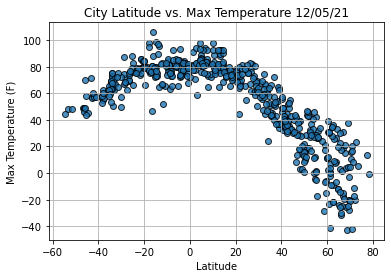

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

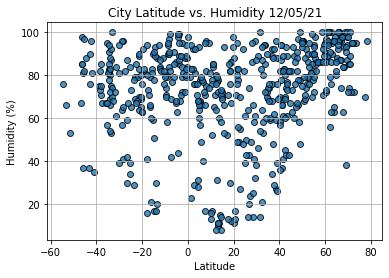

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

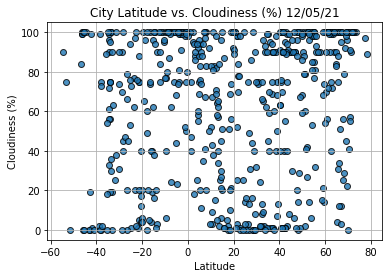

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

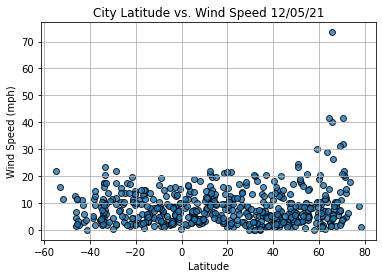

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()